In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

np.random.seed(1)

In [4]:
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')

loss = tf.Variable((y - y_hat)**2, name='loss')
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(sess.run(loss))

9


In [5]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [6]:
sess = tf.Session()
print(sess.run(c))

20


In [7]:
x = tf.placeholder(tf.int64, name='x')
print(sess.run(2 * x, feed_dict = {x: 3}))

6


In [0]:
def linear_function():
  """
  Implement a linear function:
          Initializes X to be a random tensor of shape (3, 1)
          Initializes W to be a random  tensor of shape (4, 3)
          Initializes b to be a random tensor of shape (4, 1)
  Returns:
  result -- runs the session for Y = WX + b
  """

  np.random.seed(1)
  X = tf.constant(np.random.randn(3, 1), name='x')
  W = tf.constant(np.random.randn(4, 3), name='W')
  b = tf.constant(np.random.randn(4, 1), name='b')
  
  Y = tf.add(tf.matmul(W, X), b)

  with tf.Session() as sess:
    result = sess.run(Y)

  sess.close()
  return result

In [9]:
print('result = \n' + str(linear_function()))

result = 
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [10]:
# SIGMOID
def sigmoid(z):
  """
  Computes the sigmoid of z

  Arguments:
  z -- input value, scalar or vector

  Returns:
  results -- the sigmoid of z
  """

  # Create a placeholder for x. Name it ' x'.
  x = tf.placeholder(tf.float64, name='x')

  # compute sigmoid
  sigmoid = tf.sigmoid(x)

  # create a session and run it
  with tf.Session() as sess:
    result = sess.run(sigmoid, feed_dict={x: z})

  return result

print('Sigmoid(0) = ' + str(sigmoid(0)))
print('Sigmoid(12) = ' + str(sigmoid(12)))

Sigmoid(0) = 0.5
Sigmoid(12) = 0.9999938558253978


In [11]:
def costs(logits, labels):
  """
  Computes the cost using the sigmoid cross entropy

  Arguments:
  logits -- vector containing z, output of the last linar unit(before the sigmoid activation function)
  labels -- vector of labels y (1 or 0)

  Returns:
  cost -- runs the session of the cost 
  """

  # create the placeholders for "logits" (z) and labels (y)
  z = tf.placeholder(tf.float64, name='z')
  y = tf.placeholder(tf.float64, name='y')

  # use the loss function
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
  with tf.Session() as sess:
    cost = sess.run(cost, feed_dict={z: logits, y: labels})

  return cost

logits = np.array([0.2, 0.4, 0.7, 0.9])
cost = costs(logits, np.array([0, 0, 1, 1]))
print('cost = ' + str(cost))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = [0.79813887 0.91301525 0.40318605 0.34115387]


In [12]:
def one_hot_matrix(labels, C):
  """
  Creates a matrix where the i-th row corresponds to the ith class number and
  the jth column corresponds to the jth training example. So if example j had a label i

  Arguments:
  labels -- vector containing the labels
  C -- number of classes, the depth of the one hot dimension

  Returns:
  one hot -- one hot matrix
  """

  # Create a tf.constant equal to C(depth), name it 'C'
  C = tf.constant(C, name='C')
  # Use tf.one_hot, be careful with the axis
  one_hot_matrix = tf.one_hot(labels, C, axis=0)

  # Create the session
  with tf.Session() as sess:
    one_hot = sess.run(one_hot_matrix)

  return one_hot

labels = np.array([1, 2, 3, 0, 2, 1])
one_hot = one_hot_matrix(labels, C=4)
print('one hot = \n' + str(one_hot))


one hot = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [13]:
def ones(shape):
  """
  Creates an array of ones of dimension shape

  Arguments:
  shape -- shape of the array you want to  create

  Returns:
  ones -- array containing only ones
  """

  # Create "ones" tensor using tf.ones()
  ones = tf.ones(shape)

  # Create the session
  with tf.Session() as sess:
    ones = sess.run(ones)

  return ones

print('ones = ' + str(ones([3, 1])))

ones = [[1.]
 [1.]
 [1.]]


y = 5


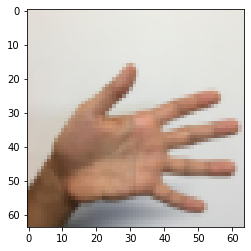

In [14]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
index = 0 
plt.imshow(X_train_orig[index])
print('y = ' + str(np.squeeze(Y_train_orig[:, index])))

In [15]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255
X_test = X_test_flatten/255
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print('number of training examples = ' + str(X_train.shape[1]))
print('number of test examples = ' + str(X_test.shape[1]))
print('X_train shape: ' + str(X_train.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('Y_test shape: ' + str(Y_test.shape))




number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [16]:
def create_placeholder(n_x, n_y):
  """
  Creates the placeholder for the tensorflow session

  Arguments:
  n_x -- scalarm size of an image vector
  n_y -- scalar, number of classes

  Returns:
  X -- placeholder for the data input, of shape [n_x, None] and dtype 'tf.float32'
  Y -- placeholder for the input labels, of shape [n_y, None] and dtype 'tf.float32'

  Tips:
  - You will use None because it let's us be flexible on the number of examples
  """

  X = tf.placeholder(dtype=tf.float64, shape=[n_x, None])
  Y = tf.placeholder(dtype=tf.float64, shape=[n_y, None])

  return X, Y

X, Y = create_placeholder(12288, 6)
print('X = ' + str(X))
print('Y = ' + str(Y))


X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float64)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float64)


In [17]:
def initialize_parameter():
  """
  Initialize parameter to build  a neural network with tensorfow. The shapes
            W1 : [25, 12288]
            b1 : [25, 1]
            W2 : [12, 25]
            b2 : [12, 1]
            W3 : [6, 12]
            b3 : [6, 1]

  Returns: 
  parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
  """

  tf.set_random_seed(1)
  W1 = tf.get_variable('W1', [25, 12288], initializer=tf.contrib.layers.xavier_initializer(seed=1), dtype=tf.float64)
  b1 = tf.get_variable('b1', [25, 1], initializer= tf.zeros_initializer(), dtype=tf.float64)
  W2 = tf.get_variable('W2', [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1), dtype=tf.float64)
  b2 = tf.get_variable('b2', [12, 1], initializer=tf.zeros_initializer(), dtype=tf.float64)
  W3 = tf.get_variable('W3', [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1), dtype=tf.float64)
  b3 = tf.get_variable('b3', [6, 1], initializer=tf.contrib.layers.xavier_initializer(seed=1), dtype=tf.float64)

  parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'W3': W3, 'b2': b2, 'b3': b3}
  return parameters

tf.reset_default_graph()
with tf.Session() as sess:
  parameters = initialize_parameter()
  print('W1 = ' + str(parameters['W1']))
  print('b1 = ' + str(parameters['b1']))
  print('W2 = ' + str(parameters['W2']))
  print('b2 = ' + str(parameters['b2']))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float64_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float64_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float64_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float64_ref>


In [18]:
def forward_propagation(X, parameters):
  """
  Implements the forward propagation for the model: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

  Arguments:
  X -- input datasets placeholder, of shape(input size, number of examples)
  parameters 

  Returns:
  Z3 -- the output of the last LINEAR unit
  """

  # Retrieve teh parameters from the dictionary "parameters"
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = tf.add(tf.matmul(W1, X), b1)
  A1 = tf.nn.relu(Z1)
  Z2 = tf.add(tf.matmul(W2, A1), b2)
  A2 = tf.nn.relu(Z2)
  Z3 = tf.add(tf.matmul(W3, A2), b3)

  return Z3

tf.reset_default_graph()

with tf.Session() as sess:
  X, Y = create_placeholder(12288, 6)
  parameters = initialize_parameter()
  Z3 = forward_propagation(X, parameters)
  print('Z3 = ' + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float64)


In [19]:
def compute_cost(Z3, Y):
  """
  Compute the cost

  Arguments:
  Z3 -- output of forward propagation
  Y -- 'true' labels vector placeholder

  Returns:
  cost - Tensor of the cost function
  """

  # to fit the tensorflow requirement
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

  return cost

tf.reset_default_graph()

with tf.Session() as sess:
  X, Y = create_placeholder(12288, 6)
  parameters = initialize_parameter()
  Z3 = forward_propagation(X, parameters)
  cost = compute_cost(Z3, Y)
  print('cost = ' + str(cost))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float64)


In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, print_cost = True):
  """
  Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX
  """
  ops.reset_default_graph()   # to be able to return the model without overwritting tf
  tf.set_random_seed(1)
  seed = 3
  (n_x, m) = X_train.shape    # input size
  n_y = Y_train.shape[0]      # output size
  costs = []

  # Create placeholder of shape (n_x, n_y)
  X, Y = create_placeholder(n_x, n_y)

  # Initialize parameters
  parameters = initialize_parameter()

  # Forward propagation
  Z3 = forward_propagation(X_train, parameters)

  # Cost function
  cost = compute_cost(Z3, Y_train)

  # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

  # Initialize all the variables
  init = tf.global_variables_initializer()

  # Start the session to compute the tensorflow graph
  with tf.Session() as sess:
    # Run the initialization
    sess.run(init)

    # Do the training loop
    for epoch in range(num_epochs):
      epoch_cost = 0
      num_minibatches = int(m / minibatch_size)
      seed = seed + 1
      minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

      for minibatch in minibatches:
        # Select a minibatch
        (minibatch_X, minibatch_Y) = minibatch
        # Run the session to excute the 'optimizer' and the  'cost'
        _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

        epoch_cost += minibatch_cost / num_minibatches
      
      if print_cost == True and epoch % 100 == 0:
        print('Cost after epoch %i: %f' %(epoch, epoch_cost))
      if print_cost == True and epoch % 5 == 0:
        costs.append(epoch_cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title('Learning rate =' + str(learning_rate))
    plt.show()

    # Lets save the parameters in a variable
    parameters = sess.run(parameters)
    print('Parameters have been trained')

    # Caculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

    # Caculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

    print('Train Accuracy: ', accuracy.eval({X: X_train, Y: Y_train}))
    print('Test Accuracy:', accuracy.eval({X: X_test, Y: Y_test}))

    return parameters


In [0]:
parameter = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 1.869409
